## **Basic dendrogram**

- #### **dist()** = ใช้วัดความห่างระหว่างตัวอย่าง

- #### **hclust()** = เปลี่ยนจาก cluster เป็น hierarchical 

- #### **plot()** =  ใช้ plot ให้กราฟออกมาเป็นกิ่งก้านแตกย่อยออกมา

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> ggplot2 3.2.1     <U+221A> purrr   0.3.3
<U+221A> tibble  2.1.3     <U+221A> dplyr   0.8.3
<U+221A> tidyr   1.0.0     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


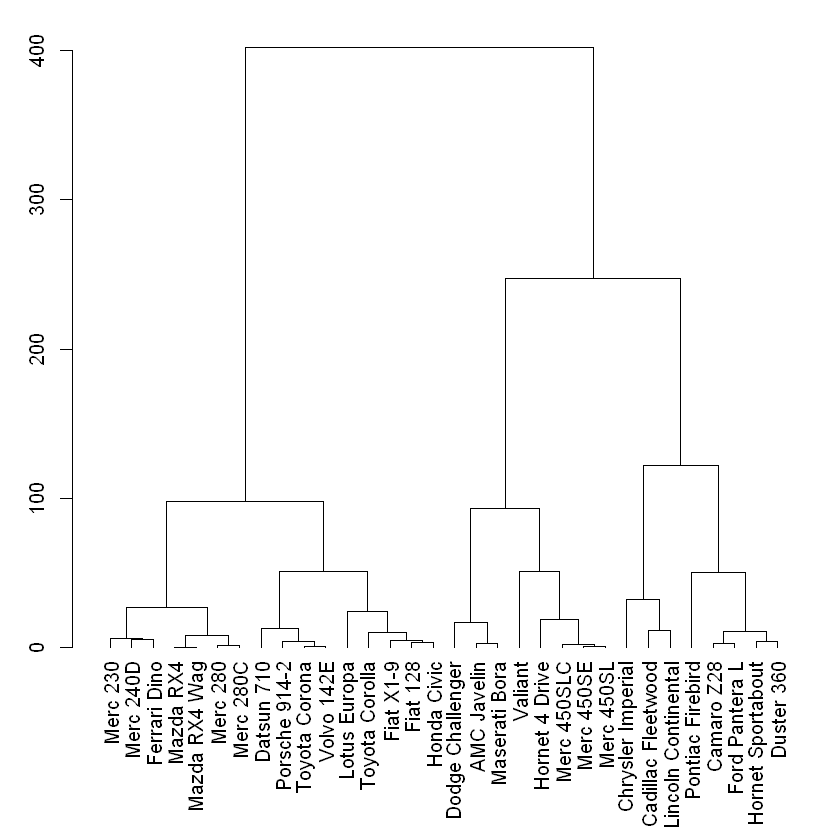

In [3]:
# Library
library(tidyverse)
 
# Data
head(mtcars)
 
# Clusterisation using 3 variables
mtcars %>% 
  select(mpg, cyl, disp) %>% 
  dist() %>% 
  hclust() %>% 
  as.dendrogram() -> dend
 
# Plot
par(mar=c(7,3,1,1))  # Increase bottom margin to have the complete label
plot(dend)

## **การกำหนดลักษณะด้วย set()**


---------------------
Welcome to dendextend version 1.13.2
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




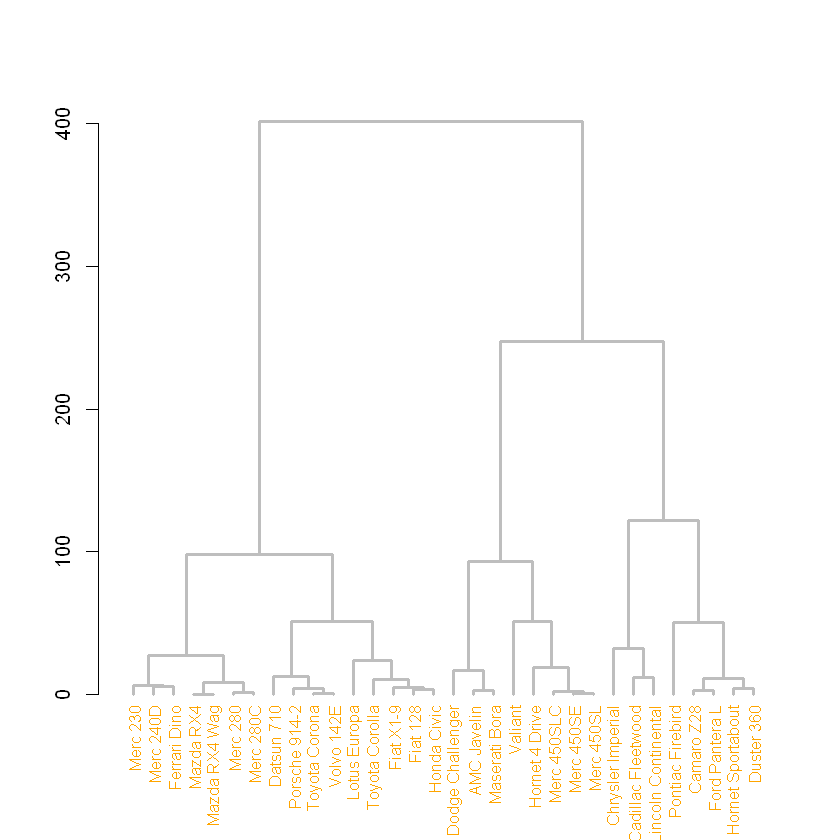

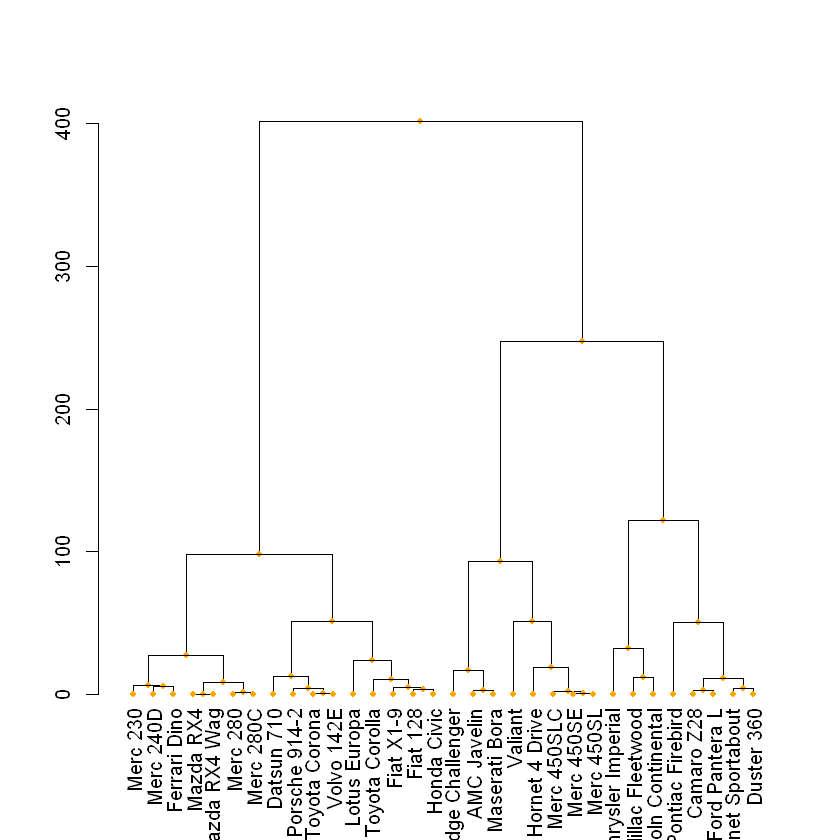

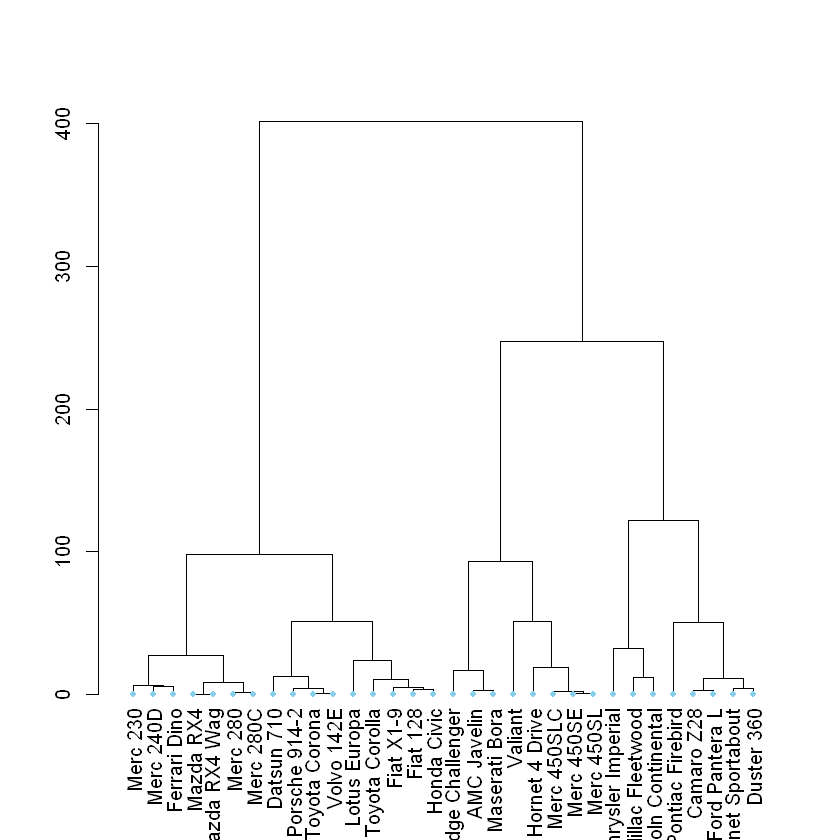

In [4]:
# library
library(dendextend)

# Chart (left)
dend %>% 
  # Custom branches
  set("branches_col", "grey") %>% set("branches_lwd", 3) %>%
  # Custom labels
  set("labels_col", "orange") %>% set("labels_cex", 0.8) %>%
  plot()
# Middle
dend %>% 
  set("nodes_pch", 19)  %>% 
  set("nodes_cex", 0.7) %>% 
  set("nodes_col", "orange") %>% 
  plot()
# right
dend %>% 
  set("leaves_pch", 19)  %>% 
  set("leaves_cex", 0.7) %>% 
  set("leaves_col", "skyblue") %>% 
  plot()

## **การ highlight เฉพาะกิ่งที่ต้องการ**

- #### โดยใช้ฟังก์ชั่น **rect.dendrogram()**

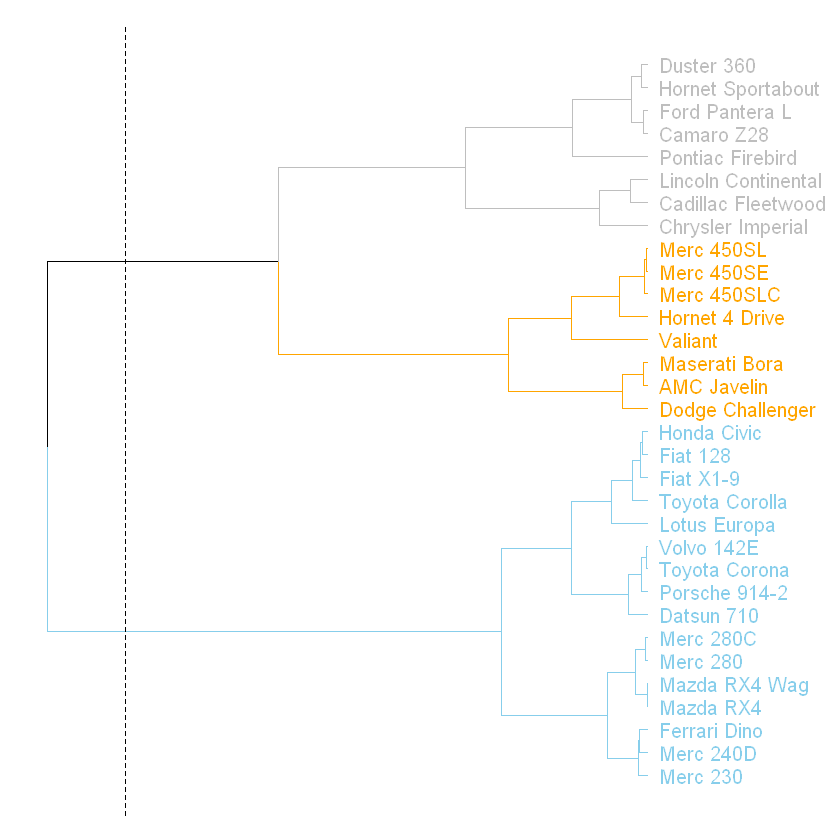

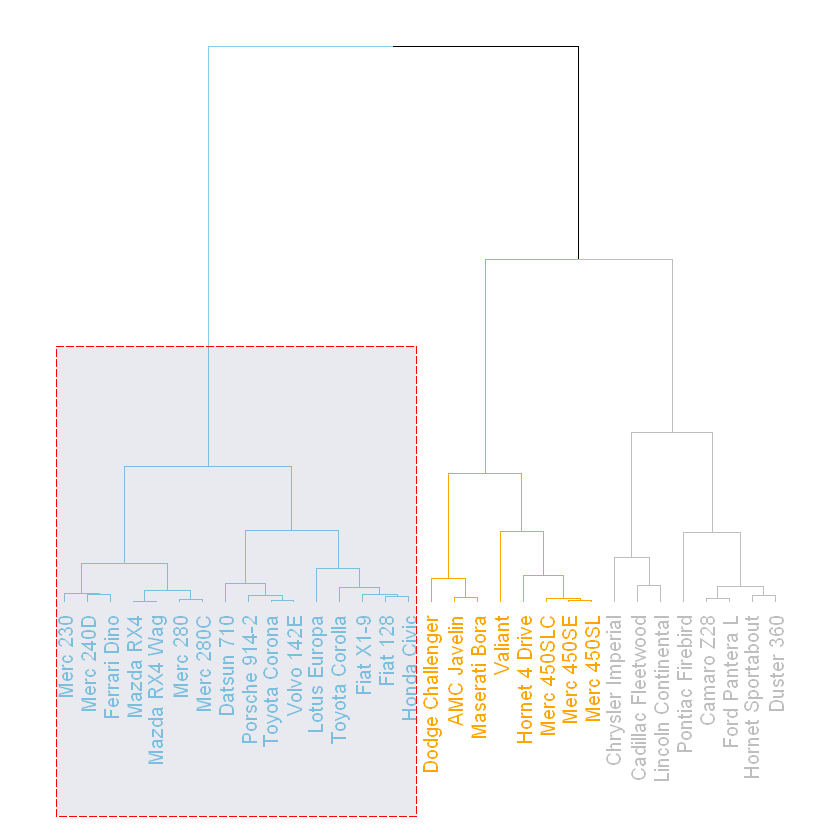

In [6]:
# Color in function of the cluster
par(mar=c(1,1,1,7))
dend %>%
  set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
  set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3) %>%
  plot(horiz=TRUE, axes=FALSE)
abline(v = 350, lty = 2)
# Highlight a cluster with rectangle
par(mar=c(9,1,1,1))
dend %>%
  set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
  set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3) %>%
  plot(axes=FALSE)
rect.dendrogram( dend, k=3, lty = 5, lwd = 0, x=1, col=rgb(0.1, 0.2, 0.4, 0.1) ) 

## **การเปรียบเทียบกราฟที่ได้กับที่คาดหวังไว้**

- #### ใช้ฟังก์ชั่น **colored_bars()**

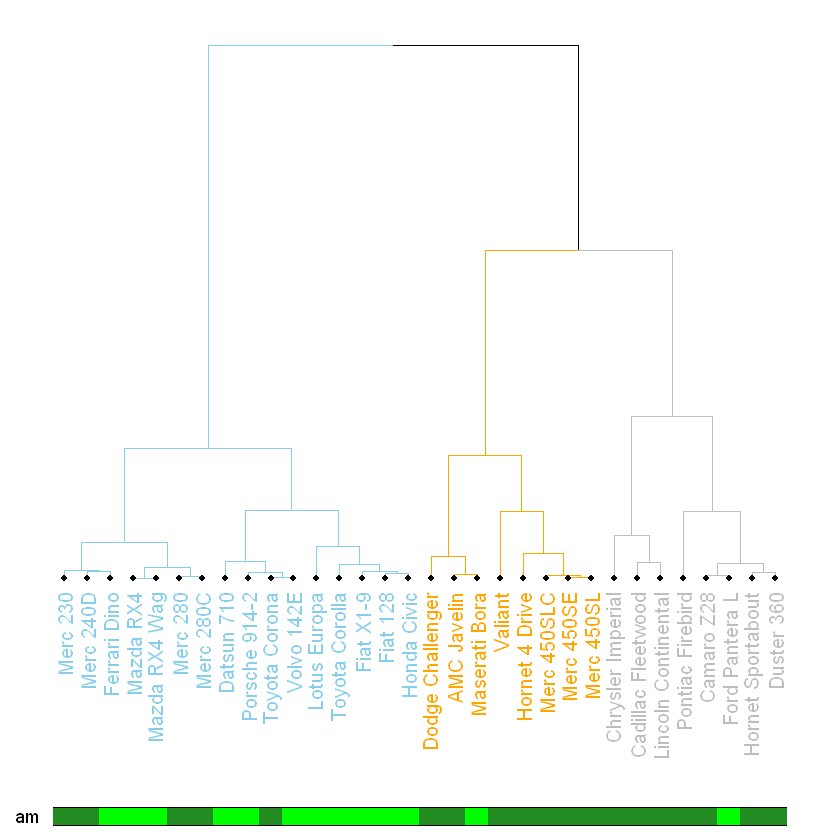

In [8]:
# Create a vector of colors, darkgreen if am is 0, green if 1.
my_colors <- ifelse(mtcars$am==0, "forestgreen", "green")
 
# Make the dendrogram
par(mar=c(10,1,1,1))
dend %>%
  set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
  set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3) %>%
  set("leaves_pch", 19)  %>% 
  set("nodes_cex", 0.7) %>% 
  plot(axes=FALSE)
 
# Add the colored bar
colored_bars(colors = my_colors, dend = dend, rowLabels = "am")

## **การเปรียบเทียบ 2 dendograms**

- #### โดยใช้ฟังก์ชั่น **tangle_gram**

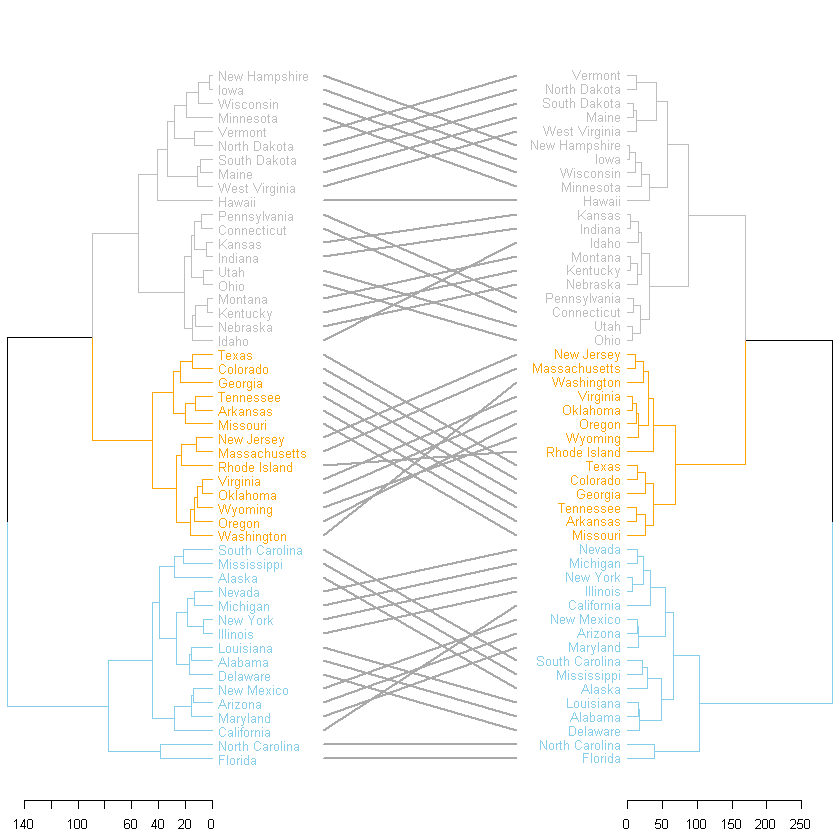

In [10]:
# Make 2 dendrograms, using 2 different clustering methods
d1 <- USArrests %>% dist() %>% hclust( method="average" ) %>% as.dendrogram()
d2 <- USArrests %>% dist() %>% hclust( method="complete" ) %>% as.dendrogram()
 
# Custom these kendo, and place them in a list
dl <- dendlist(
  d1 %>% 
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_lty", 1) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3),
  d2 %>% 
    set("labels_col", value = c("skyblue", "orange", "grey"), k=3) %>%
    set("branches_lty", 1) %>%
    set("branches_k_color", value = c("skyblue", "orange", "grey"), k = 3)
)
 
# Plot them together
tanglegram(dl, 
           common_subtrees_color_lines = FALSE, highlight_distinct_edges  = TRUE, highlight_branches_lwd=FALSE, 
           margin_inner=7,
           lwd=2
)